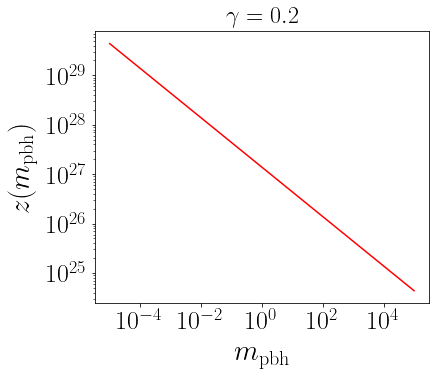

In [2]:
# Accretion of matter and radiation around the PBH from RD to MRE such that
# dm/dz = dm/dt . dt/dz with full dt/dz calculated from t_3 with
# t_3 = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)).


from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
from accretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

bin_centres = np.geomspace(1e5, 1e-5, 6)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m1_arr = np.geomspace(1e5, 1e-5, 6)
m2_arr = np.geomspace(1e5, 1e-5, 6)




plt.figure(figsize = (6, 5))
plt.loglog(m1_arr , z_pbh(m1_arr, γ = 0.2), 'r')
plt.xlabel('$m_\mathrm{pbh}$', fontsize = 29, labelpad = 10) 
plt.ylabel('$z(m_\mathrm{pbh})$', fontsize = 29, labelpad = 10)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.title('$\gamma = 0.2$', fontsize = 24, pad = 8)
plt.show()

/tmp/ipykernel_59456/3603376064.py:11: RuntimeWarning: overflow encountered in double_scalars
  dm = (β * (m**2) * (1 + z)**4)/ ((c_s(z)**3) * np.sqrt((Ω_r0 * ((1+z)**6)) + (Ω_m0 * ((1+z)**5))))


ValueError: need at least one array to concatenate

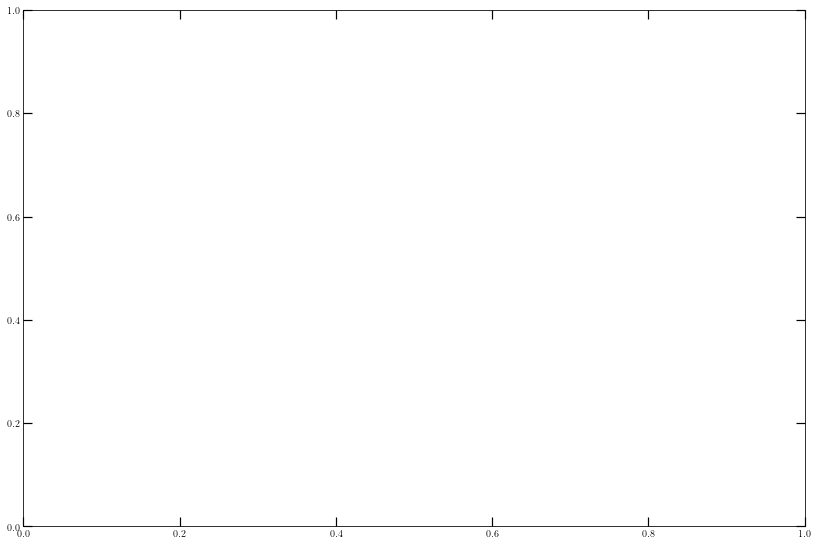

In [3]:
# Accretion around the PBH from RD to MRE.
# Here, s = a/a_eq
# Here, v = c_s with c_s speed of sound in the surrounding medium.
# Here, γ is the ratio between the PBH mass and the horizon mass.


def m_racc(t, y):
    z = t
    m = y[0]
    β = ((4 * π * (G**2) * η_acc)) * ((3/(8 * π * G * ρ_c0))**(1/2))
    dm = (β * (m**2) * (1 + z)**4)/ ((c_s(z)**3) * np.sqrt((Ω_r0 * ((1+z)**6)) + (Ω_m0 * ((1+z)**5))))
    return dm
    


    
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (14, 9.5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



for i, (m1, color) in enumerate(zip(m1_arr, colors)):
    m1*= M_solar
    γ = 0.2
    z_i = z_pbh(m1,  γ)
    t = np.geomspace(z_i, z_eq, 100000)
    sol = solve_ivp(m_racc, t_span = [t[0], t[-1]], y0 = [m1], t_eval = t)
    y = sol.y.T 
    t = sol.t
    ax.loglog(t, y, color = color)
    
    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)


plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$z$',fontsize = 52, labelpad = 14)
plt.ylabel(r'$\frac{(m_\mathrm{r,\, acc}(z) - m)}{m} $',fontsize = 58, labelpad = 14)
plt.legend(['$10^{5}$', r'$10^{3}$',
            '$10^{-1}$', '$10^{-3}$', r'$10^{-5}$'], 
           prop = {'size':32}, loc = (1.02, 0.04), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
plt.xlim(1e16, 0.5*z_eq)
#plt.ylim(1e-5, 0.1)
plt.title(r'Radiation accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1$', fontsize = 40, pad = 11)
#plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()